In [1]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mv_df = pd.read_csv(os.path.join("..", "Resources", "movie_metadata_adjusted_revenue.csv"))
# mv_df['popularity'] = mv_df['popularity'].astype(int)
mv_df['revenue'] = mv_df['revenue'].str.replace(',','').astype(float).astype(int)
mv_df['popularity'] = mv_df['popularity'].astype(str)
# mv_df['budget'] = mv_df['budget'].astype(str)
# mv_df['vote_count'] = mv_df['vote_count'].astype(str)
# mv_df['revenue'] = mv_df['revenue'].str.replace(',','').astype(float).astype(int)
mv_df = mv_df.drop(columns={'Unnamed: 0'}, axis=1)
mv_df.dtypes

title            object
budget            int64
popularity       object
release_date      int64
revenue           int64
runtime           int64
vote_average    float64
vote_count        int64
dtype: object

In [3]:
# target = mv_df['revenue']
target = mv_df['popularity']
# data = mv_df.drop("revenue", axis=1)
data = mv_df.drop("popularity", axis=1)
feature_names = data.columns
print(feature_names)

Index(['title', 'budget', 'release_date', 'revenue', 'runtime', 'vote_average',
       'vote_count'],
      dtype='object')


In [4]:
X, y = make_classification(n_samples=300, n_features=7, n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X, y)
# rf.predict(np.array([8,1]).reshape(-1, 1))
# model = rf.predict(np.array([8,1])).shape
# model = np.array([8,1]).shape
# print(model)

/Users/brian.abbe/anaconda3/envs/Pythondata/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [5]:
enc = KBinsDiscretizer(n_bins=8, encode='ordinal')
enc.fit(X)
result = enc.transform(X)
# print(result)

In [6]:
# print(result[:,1:2])
X[:,2:3] = result[:,2:3]
X[:,3:4] = result[:,3:4]
X[:,5:6] = result[:,5:6]
X[:,7:8] = result[:,7:8]
X[:,8:9] = result[:,8:9]
# X[:,2:9] = result[:,2:9]

# print(X[9][4])

In [7]:
rf2 = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=200)
rf2.fit(X, y)
print(rf2.feature_importances_)

[0.20109757 0.61651398 0.02810895 0.02666734 0.05398098 0.01942661
 0.05420458]


In [8]:
sorted(zip(rf2.feature_importances_, mv_df.title), reverse=True)

[(0.6165139835156764, 'The Shawshank Redemption'),
 (0.2010975687818286, 'The Godfather'),
 (0.054204575038795555, 'Whiplash'),
 (0.053980977229238905, "One Flew Over the Cuckoo's Nest"),
 (0.02810894500754481, 'Fight Club'),
 (0.02666733741445904, "Schindler's List"),
 (0.019426613012456757, 'The Dark Knight')]

In [9]:
# rf = RandomForestClassifier()
# rf = rf.fit(X.revenue, y.vote_average)
# rf.score(mv_df.revenue, mv_df.vote_average)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
rf2 = rf2.fit(X_train, y_train)
rf2.score(X_test, y_test)
# print(feature_names.revenue)

0.9733333333333334

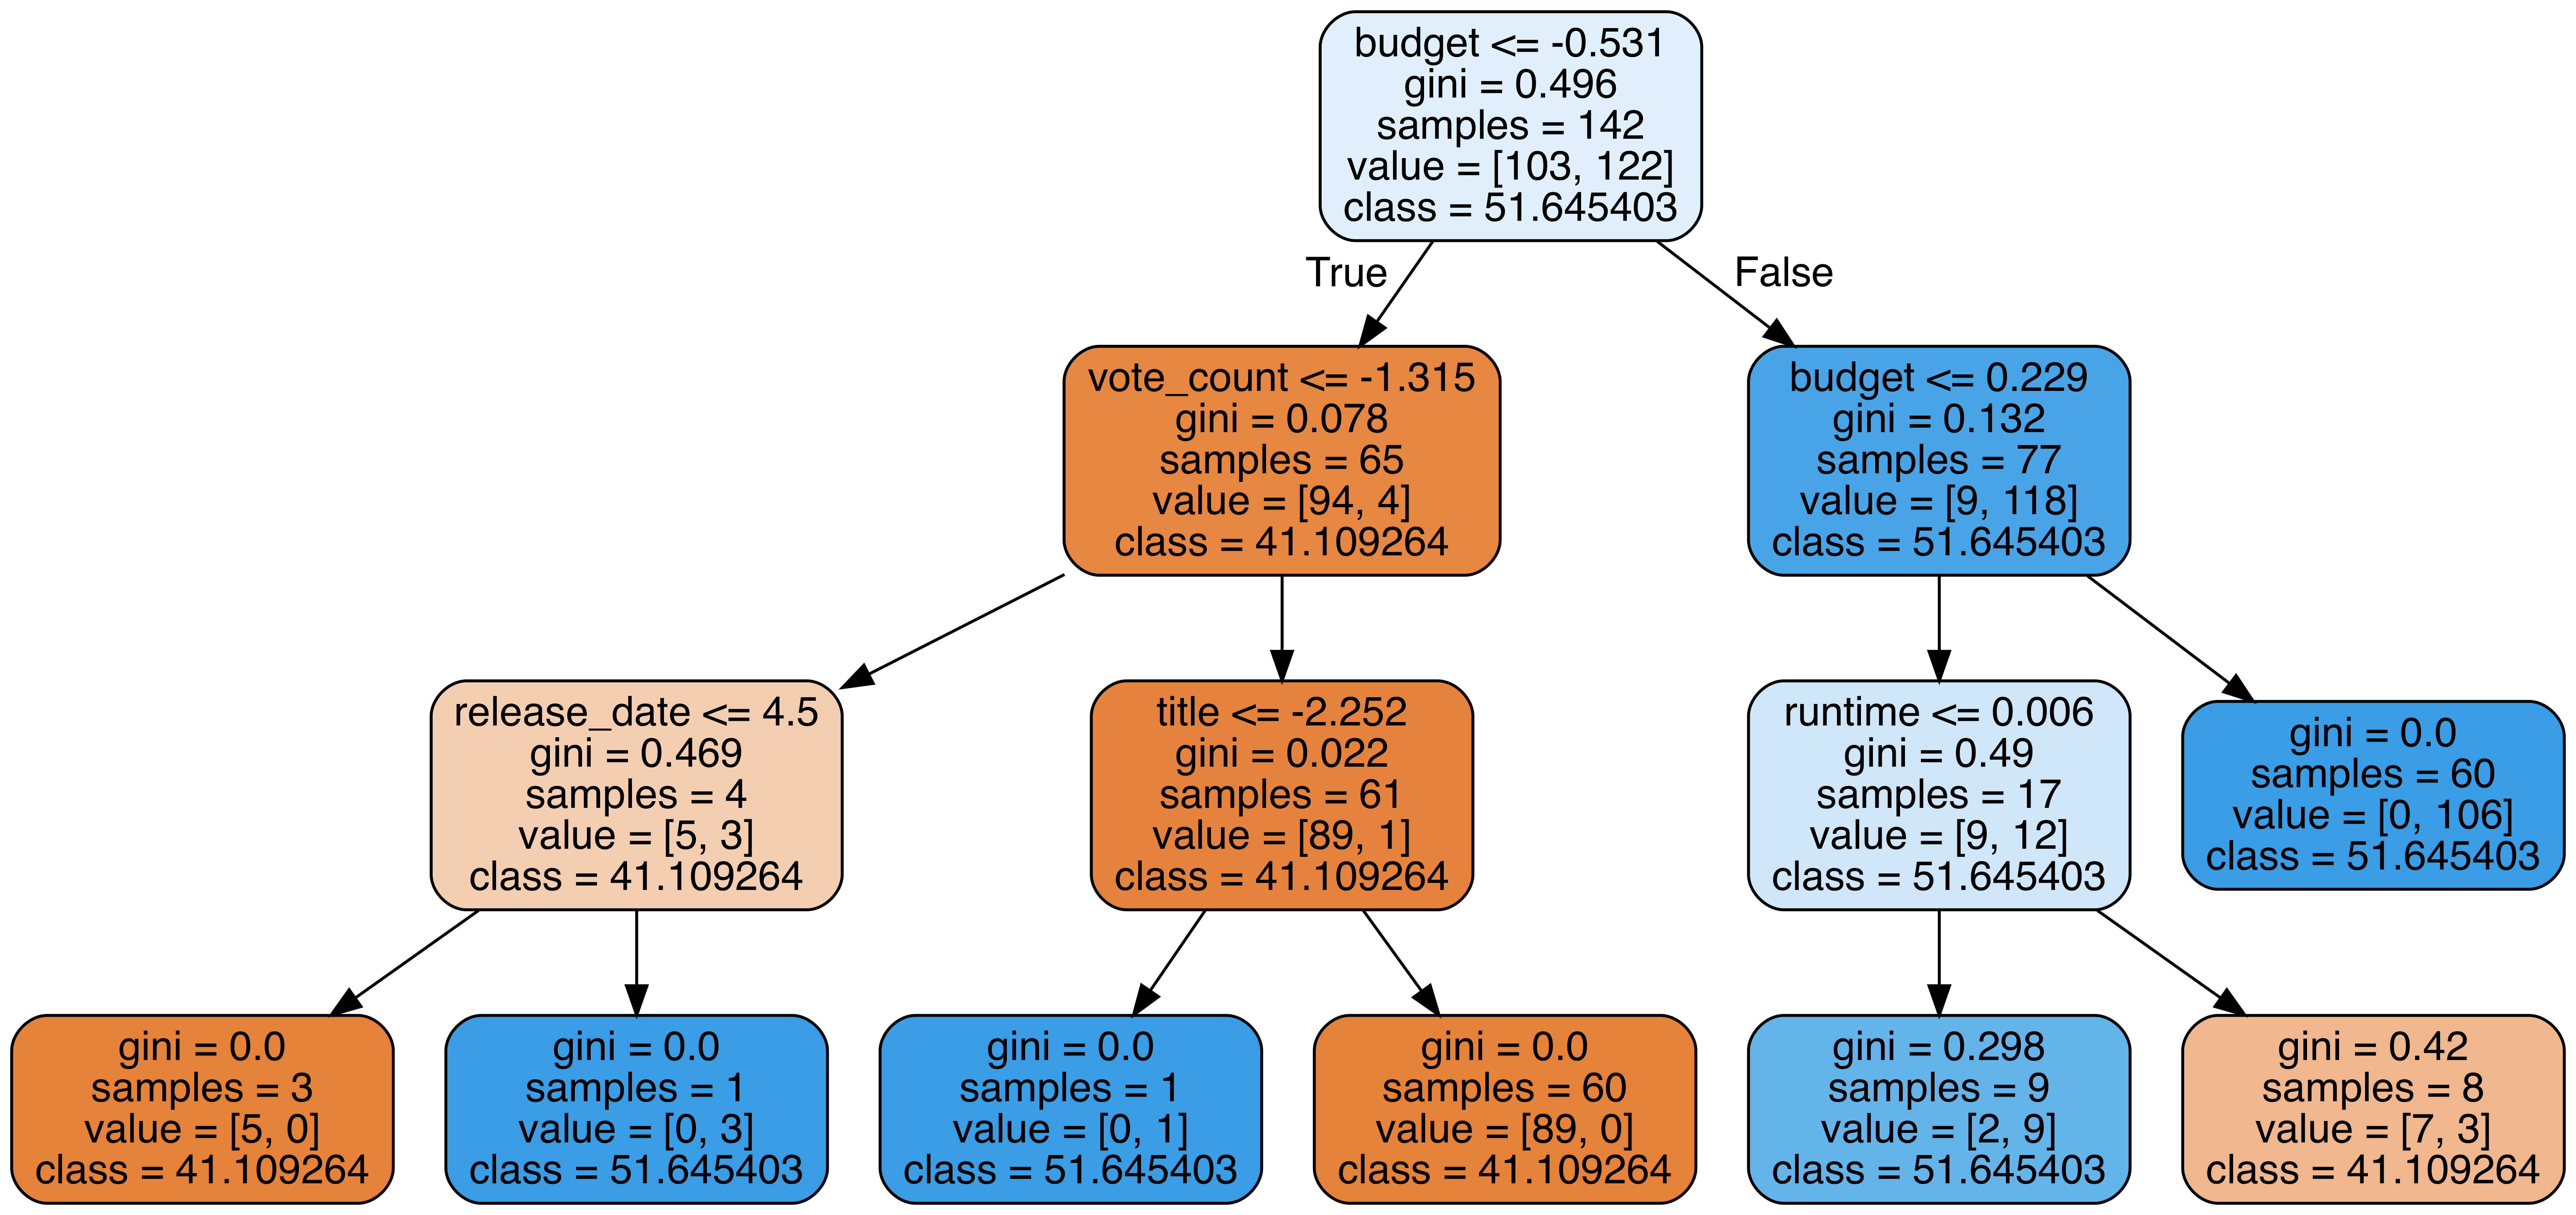

In [11]:
estimator = rf2.estimators_[5]

export_graphviz(estimator, out_file='movie.dot', 
                feature_names = feature_names,
                class_names = target,filled=True,
                rounded = True, proportion = False)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'movie.dot', '-o', 'movies.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'movies.png')

In [13]:
# # Save the model
# rf2.save("movie_forest.h5")

AttributeError: 'RandomForestClassifier' object has no attribute 'save'

In [ ]:
# # Load the model
# from tensorflow.keras.models import load_model
# voice_model = load_model("movie_forest.h5")